<a href="https://colab.research.google.com/github/iveksl2/ds_skills/blob/statistical_inference_class/math_and_stats/bayesian_r_lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Binomial Bayes Factor**

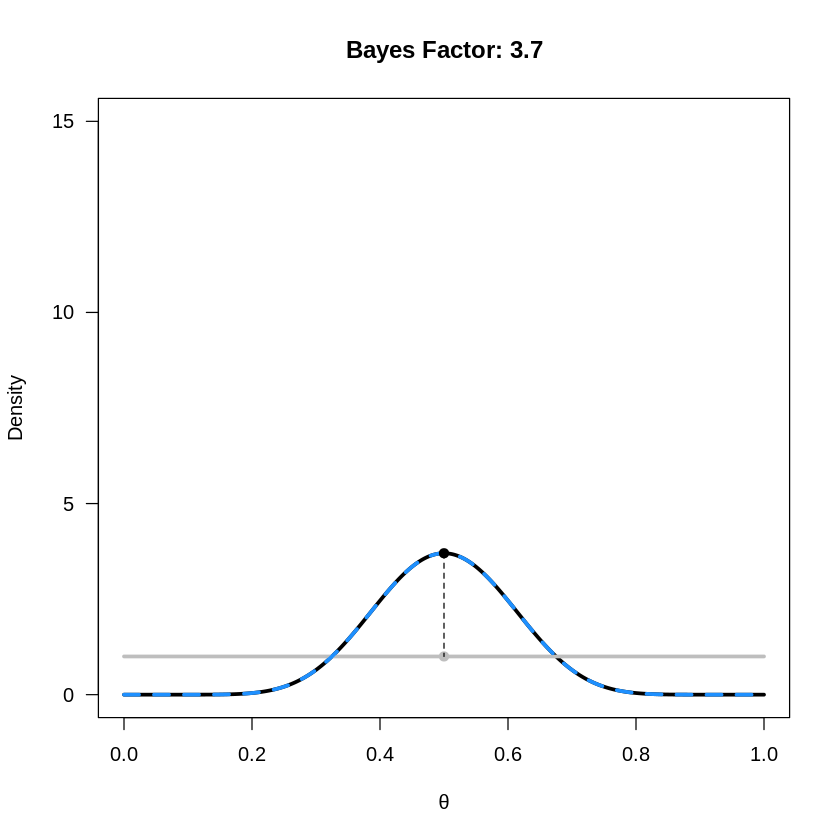

In [3]:
H0<-0.5 #Set the point null hypothesis you want to calculate the Bayes Factor for
n<-20 #set total trials
x<-10 #set successes
aprior<-1 #Set the alpha for the Beta distribution for the prior
bprior<-1 #Set the beta for the Beta distribution for the prior

alikelihood<-x+1 #Calculate the alpha for the Beta distribution for the likelihood
blikelihood<-n-x+1 #Calculate the beta for the Beta distribution for the likelihood
aposterior<-aprior+alikelihood-1 #Calculate the alpha for the Beta distribution for the posterior
bposterior<-bprior+blikelihood-1 #Calculate the beta for the Beta distribution for the posterior

theta<-seq(0,1,0.001) #create theta range from 0 to 1
#png(file="PriorLikelihoodPosterior.png",width=3000,height=3000, res = 500)
prior <- dbeta(theta, aprior, bprior)
likelihood <- dbeta(theta, alikelihood, blikelihood)
posterior <- dbeta(theta, aposterior, bposterior)
plot(theta, posterior, ylim=c(0, 15), type = "l", lwd = 3, xlab = bquote(theta), ylab = "Density", las = 1)
lines(theta, prior, col="grey", lwd = 3)
lines(theta, likelihood, lty = 2, lwd = 3, col="dodgerblue")
BF10<-dbeta(H0, aposterior, bposterior)/dbeta(H0, aprior, bprior)
points(H0,dbeta(H0, aposterior, bposterior), pch = 19)
points(H0,dbeta(H0, aprior, bprior), pch = 19, col="grey")
segments(H0, dbeta(H0, aposterior, bposterior), H0, dbeta(H0, aprior, bprior), lty=2)
title(paste('Bayes Factor:',round(BF10,digits=2)))
#dev.off()

#Š Daniel Lakens, 2016. 
# This work is licensed under a Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License. https://creativecommons.org/licenses/by-nc-sa/4.0/

**Binomial Posterior Mean**

Loading required package: binom

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘binom’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



method,x,n,shape1,shape2,mean,lower,upper,sig
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bayes,10,20,11,11,0.5,0.2978068,0.7021932,0.05


method,x,n,shape1,shape2,mean,lower,upper,sig
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bayes,10,20,11,11,0.5,0.2978068,0.7021932,0.05


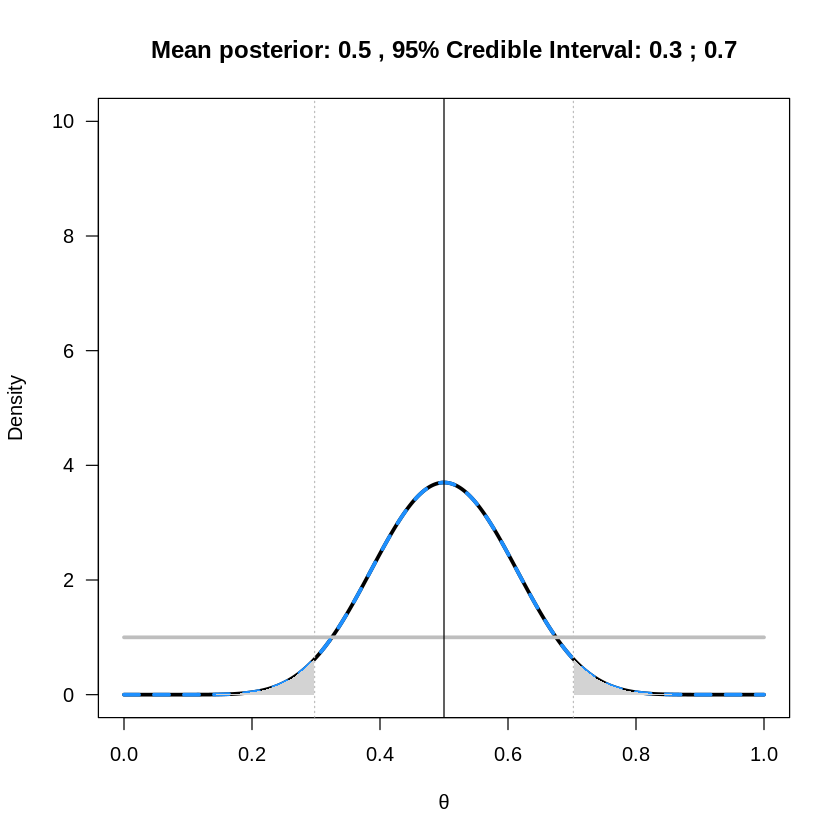

In [4]:
n<-20 #set total trials
x<-10 #set successes
aprior<-1 #Set the alpha for the Beta distribution for the prior
bprior<-1 #Set the beta for the Beta distribution for the prior

ymax<-10 #set max y-axis

alikelihood<-x+1 #Calculate the alpha for the Beta distribution for the likelihood
blikelihood<-n-x+1 #Calculate the beta for the Beta distribution for the likelihood
aposterior<-aprior+alikelihood-1 #Calculate the alpha for the Beta distribution for the posterior
bposterior<-bprior+blikelihood-1 #Calculate the beta for the Beta distribution for the posterior

theta<-seq(0,1,0.001) #create theta range from 0 to 1
#png(file="BinomialPosteriorMean.png",width=4000,height=4000, res = 500)
prior <- dbeta(theta, aprior, bprior) #deterine prior distribution
likelihood <- dbeta(theta, alikelihood, blikelihood) #determine likelihood distribution
posterior <- dbeta(theta, aposterior, bposterior) #determine posterior distribution
plot(theta, posterior, ylim=c(0, ymax), type = "l", lwd = 3, xlab = bquote(theta), ylab = "Density", las = 1) #draw posterior distribution
lines(theta, prior, col="grey", lwd = 3) #draw prior distribution
lines(theta, likelihood, lty = 2, lwd = 3, col="dodgerblue") #draw likelihood distribution
LL<-qbeta(.025,aposterior, bposterior) #calculate lower limit credible interval
UL<-qbeta(.975,aposterior, bposterior) #calculate upper limit credible interval
abline(v = aposterior/(aposterior+bposterior)) #draw line mean
abline(v = LL, col="grey",lty=3) #draw line lower limit
abline(v = UL, col="grey",lty=3) #draw line upper limit
polygon(c(theta[theta<LL],rev(theta[theta<LL])),c(posterior[theta<LL], rep(0,sum(theta<LL))),col="lightgrey",border=NA)
polygon(c(theta[theta>UL],rev(theta[theta>UL])),c(posterior[theta>UL], rep(0,sum(theta>UL))),col="lightgrey",border=NA)
title(paste('Mean posterior:',round((aposterior/(aposterior+bposterior)),digits=5),", 95% Credible Interval:",round(LL,digits=2),";",round(UL,digits=2)))
#dev.off()

if(!require(binom)){install.packages('binom')}
library(binom)
binom.bayes(x, n, type = "central", prior.shape1 = aprior, prior.shape2 = bprior)
binom.bayes(x, n, type = "highest", prior.shape1 = aprior, prior.shape2 = bprior)

#Š Daniel Lakens, 2016. 
# This work is licensed under a Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License. https://creativecommons.org/licenses/by-nc-sa/4.0/